In [5]:
!pip install -q keras
import keras


from google.colab import drive

Using TensorFlow backend.


In [72]:
drive.mount('/content/drive', force_remount =True)

Mounted at /content/drive


## PreProcess Labels (One Time Setup)

In [0]:
import sys, os, time
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
import cv2

In [0]:
meta = scipy.io.loadmat("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/meta.mat")
original_idx_to_synset = {}
synset_to_name = {}

for i in range(1000):
    ilsvrc2012_id = int(meta["synsets"][i,0][0][0][0])
    synset = meta["synsets"][i,0][1][0]
    name = meta["synsets"][i,0][2][0]
    original_idx_to_synset[ilsvrc2012_id] = synset
    synset_to_name[synset] = name

synset_to_keras_idx = {}
keras_idx_to_name = {}
f = open("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/synset_words.txt","r")
idx = 0
for line in f:
    parts = line.split(" ")
    synset_to_keras_idx[parts[0]] = idx
    keras_idx_to_name[idx] = " ".join(parts[1:])
    idx += 1
f.close()

def convert_original_idx_to_keras_idx(idx):
    return synset_to_keras_idx[original_idx_to_synset[idx]]

In [0]:

f = open("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/ILSVRC2012_validation_ground_truth.txt","r")
y_val = f.read().strip().split("\n")
y_val = list(map(int, y_val))
y_val = np.array([convert_original_idx_to_keras_idx(idx) for idx in y_val])
f.close()

In [0]:
np.save("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/y_val.npy", y_val)

In [0]:
#Test Labels
for i in range(0, 20):
  print(keras_idx_to_name[y_val[i]])

In [0]:
def humansize(nbytes):
    '''From https://stackoverflow.com/questions/14996453/python-libraries-to-calculate-human-readable-filesize-from-bytes'''
    suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

## **Preprocess images**

In [0]:
fns = os.listdir("/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationData")
fns.sort()
fns = [
    "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationData/" + fn
    for fn in fns
]

In [0]:
x_val = np.zeros((len(fns), 224, 224, 3), dtype=np.float32)
print(humansize(x_val.nbytes))

In [0]:
%%time
#3520 image
#Save process and save batch-wise (500 = batch size)
#Set 'crop_size' & 'resize_size' (manually)

# img = np.asarray(bytearray(response.read()), dtype=np.uint8)
# img = cv2.imdecode(img, cv2.IMREAD_COLOR)
# img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
print(len(fns))
crop_size = 331
resize_size = 331
x_val = np.zeros((len(fns), crop_size, crop_size, 3), dtype=np.float32)
i_start = 0
while i_start<3200:
  end = min(i_start+500, len(fns))
  for i in range(i_start, end):
    if i %200 == 0:
        print("%d/%d" % (i, end))

    # Load (as BGR)
    img = cv2.imread(fns[i])

    # Resize
    height, width, _ = img.shape
    new_height = height * resize_size // min(img.shape[:2])
    new_width = width * resize_size // min(img.shape[:2])
    img = cv2.resize(img, (new_width, new_height), interpolation=cv2.INTER_CUBIC)

    # Crop
    height, width, _ = img.shape
    startx = width//2 - (crop_size//2)
    starty = height//2 - (crop_size//2)
    img = img[starty:starty+crop_size,startx:startx+crop_size]
    assert img.shape[0] == crop_size and img.shape[1] == crop_size, (img.shape, height, width)
    
    # Save (as RGB)
    x_val[i-i_start,:,:,:] = img[:,:,::-1]
  
  i = i_start/500 + 1
  i = int(i)
  path = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + str(crop_size) + "x" + str(crop_size) + "/x_val_" +  str(i) + ".npy"
  print(path)
  np.save(path, x_val)
  i_start = i_start + 500

# %%time


## Test Mapping for PreProcessed Data

In [0]:
import random

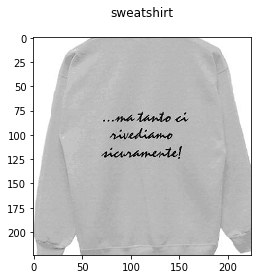

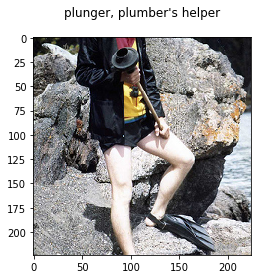

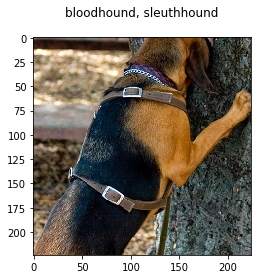

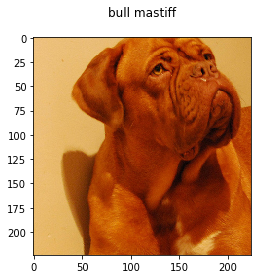

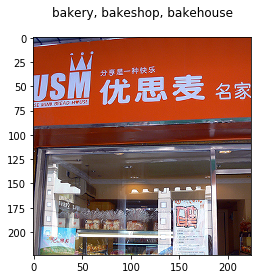

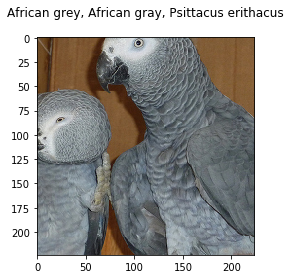

In [57]:
y_val = y_val.reshape((100, 500 ))


imageRes = "224x224"
# imageRes = "299x299"
# imageRes = "331x331"
X = ["" for x in range(7)]
X[0] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_1.npy"
X[1] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_2.npy"
X[2] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_3.npy"
X[3] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_4.npy"
X[4] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_5.npy"
X[5] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_6.npy"
X[6] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_7.npy"
# X[7] = "/content/drive/My Drive/MS_CS_DS/Sem2/AI/ImageNetValidationMetaDeta/" + imageRes + "/x_val_8.npy"

for i in range(0, 6):
#   x_val = np.load(X[i]) # loaded as RGB
  j = random.randint(0,500) #pick a random image
  if i == 7:
    j =  random.randint(0,20) #pick a random image
    
  plt.figure()
  plt.imshow(x_val[j] / 255.0)
  plt.title(keras_idx_to_name[y_val[i][j]])
  plt.show()
  plt.close()

# Download from URL(unused) :

In [4]:
# crow = 'https://pbs.twimg.com/profile_images/595665661470310401/VOb43bbP_400x400.jpg'
# wolf = 'https://kids.nationalgeographic.com/content/dam/kids/photos/animals/Mammals/A-G/gray-wolf-closeup.adapt.945.1.jpg'
# tiger = 'https://steemit-production-imageproxy-upload.s3.amazonaws.com/DQmenD8j2rha9SkqpB1gQDrkuE9FmjBTwxb4eGbmHQ81aGM'
# sailboat = 'https://upload.wikimedia.org/wikipedia/commons/d/dd/Inland_cat_sailboat.jpg'
# plane = "https://unsplash.com/photos/7ESmHghU_KY/download?force=true"
# s = "https://unsplash.com/photos/wAoA4WkiDeo/download?force=true"

# urls = ["" for x in range(6)]
# urls[5] = s
# urls[0] = crow
# urls[1] = wolf
# urls[4] = tiger
# urls[2] = plane
# urls[3] = sailboat

{'123', '123123', '3224232'}

In [0]:
# !apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python

# import urllib.request
# import cv2
# import numpy as np

# # image loader
# def url_to_image(url, resize=224):
#   """
#   downloads an image from url, converts to numpy array,
#   resizes, and returns it
#   """
#   response = urllib.request.urlopen(url)
#   img = np.asarray(bytearray(response.read()), dtype=np.uint8)
#   img = cv2.imdecode(img, cv2.IMREAD_COLOR)
#   img = cv2.resize(img, (resize, resize), interpolation=cv2.INTER_CUBIC)
#   return img

In [0]:
# for url in urls: 
# #   print(url)
#   original = url_to_image(url, 224)
# #   print('PIL original image size',original.size)
#   plt.imshow(original)
#   plt.show()

#   # convert the PIL image to a numpy array
#   # IN PIL - image is in (width, height, channel)
#   # In Numpy - image is in (height, width, channel)a
#   numpy_image = img_to_array(original)
# #   plt.imshow(np.uint8(numpy_image))
#   # plt.show()
# #   print('numpy array size',numpy_image.shape)

#   # Convert the image / images into batch format
#   # expand_dims will add an extra dimension to the data at a particular axis
#   # We want the input matrix to the network to be of the form (batchsize, height, width, channels)
#   # Thus we add the extra dimension to the axis 0.
#   image_batch = np.expand_dims(numpy_image, axis=0)
#   #  print('image batch size', image_batch.shape)

#   processed_image = densenet.preprocess_input(image_batch.copy())
#   # get the predicted probabilities for each class
#   predictions = densenet1.predict(processed_image)
#   # print predictions
#   # convert the probabilities to class labels
#   # We will get top 5 predictions which is the default
# #   plt.imshow(original)
#   for prediction in decode_predictions(predictions)[0]:
#     print(prediction[1], prediction[2])
#   print("_____________________________")
#   # plt.imshow(np.uint8(image_batch[0]))

# keras.application